In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


# Loading Data and Spliting them in X and y

In [2]:
test_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")
train_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")
sample_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv")


X = train_data.drop("Made_Purchase",axis=1)
y = train_data["Made_Purchase"].astype(int)

# Importing all libraries

In [3]:
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Exploration

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [5]:
X.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

In [6]:
X.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


HomePage


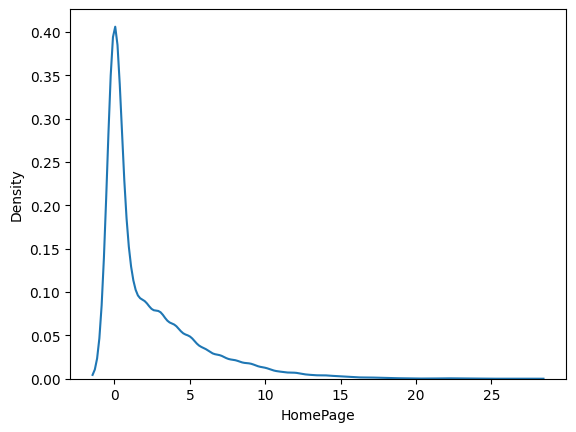

HomePage_Duration


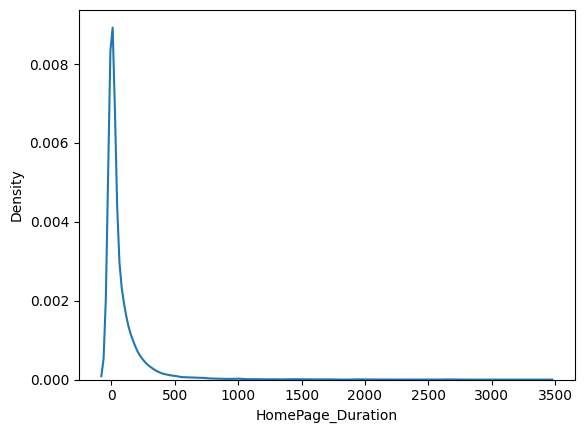

LandingPage


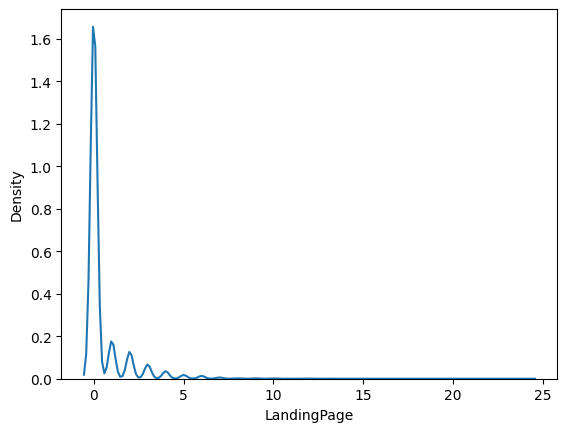

LandingPage_Duration


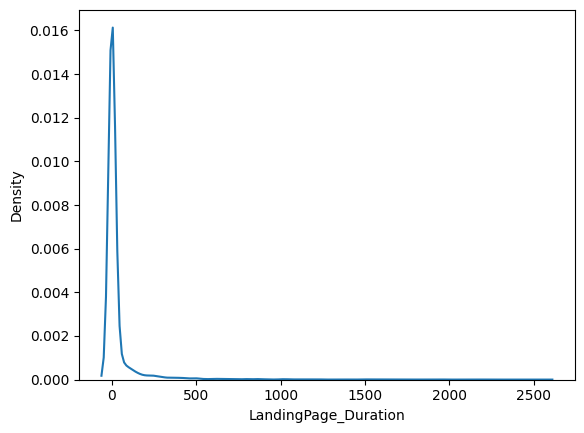

ProductDescriptionPage


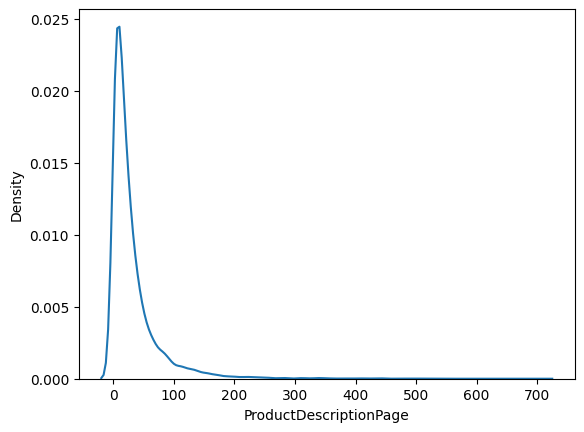

ProductDescriptionPage_Duration


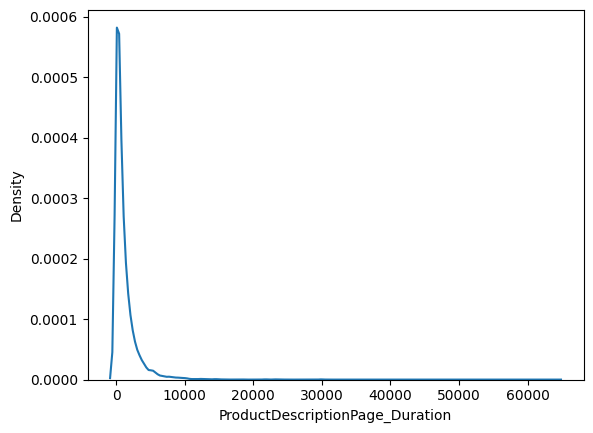

GoogleMetric:Bounce Rates


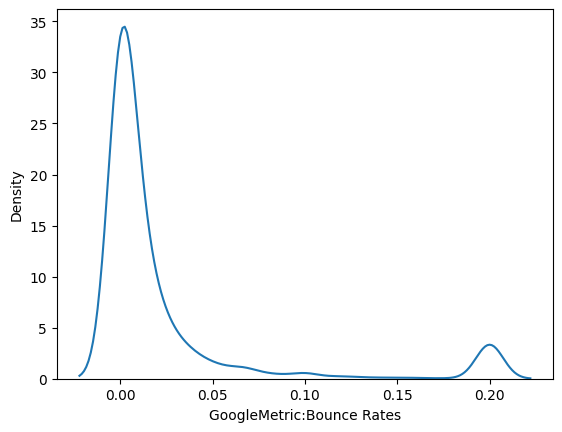

GoogleMetric:Exit Rates


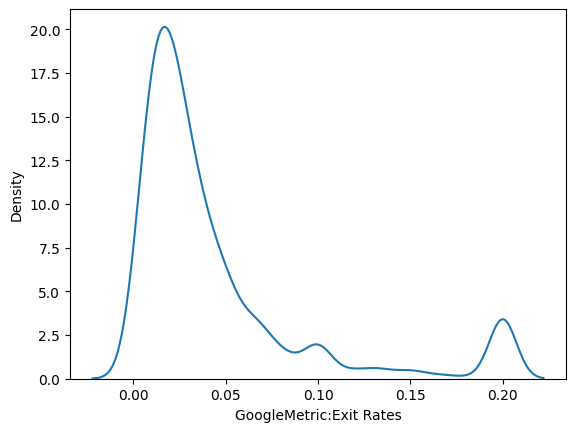

GoogleMetric:Page Values


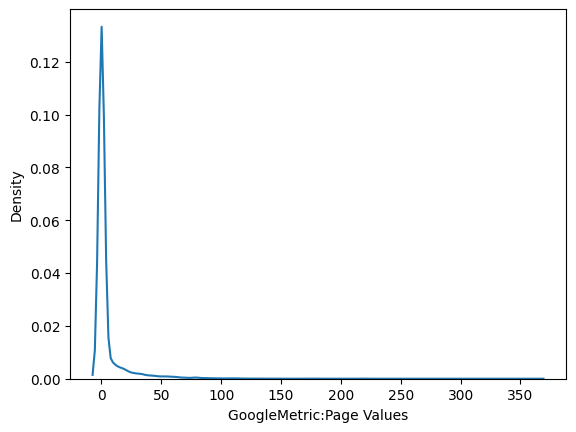

SeasonalPurchase


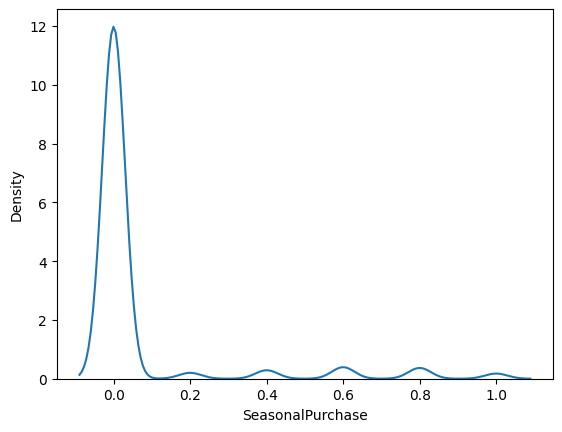

OS


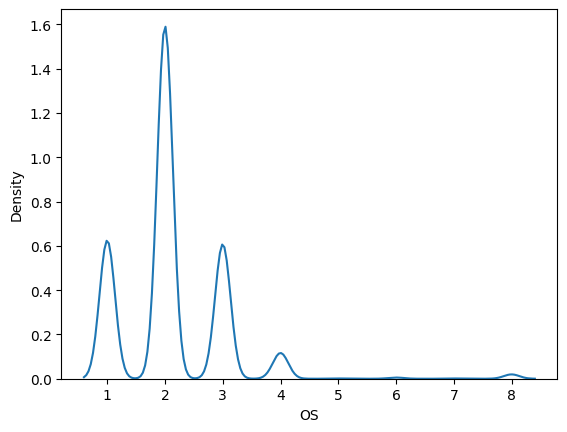

SearchEngine


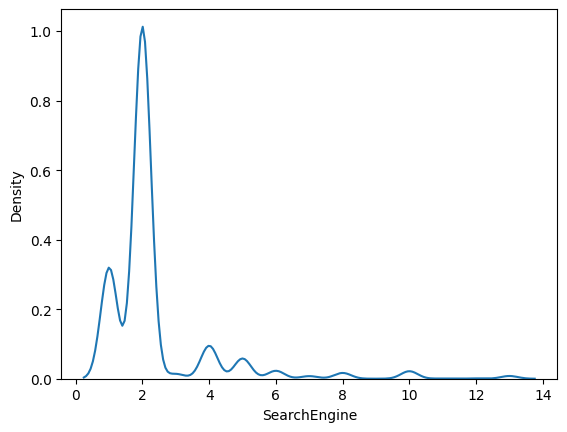

Zone


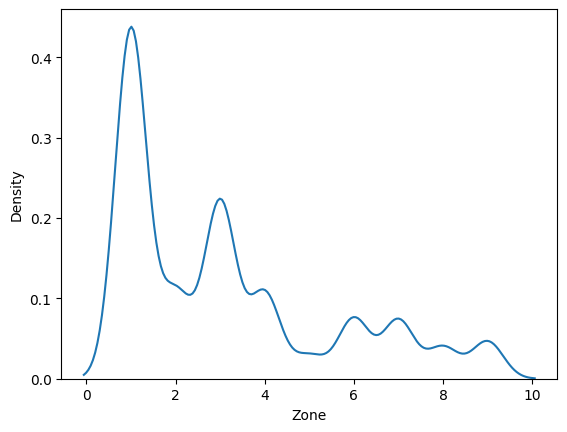

Type of Traffic


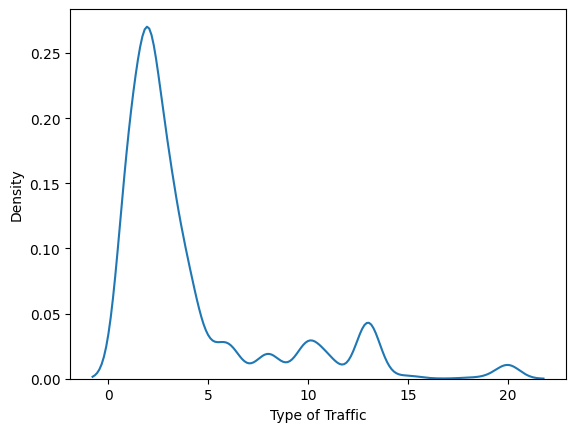

WeekendPurchase


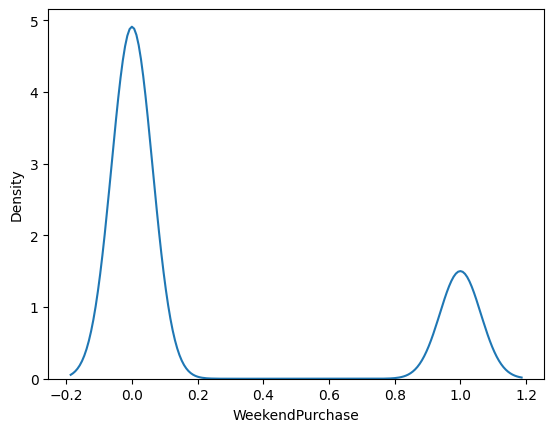

In [7]:
num = list(X.select_dtypes(include = 'float64').columns)

for i in num:
    print(i)
    sns.kdeplot(x=X[i])
    plt.show()

/tmp/ipykernel_20/2439030204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr())


<AxesSubplot: >

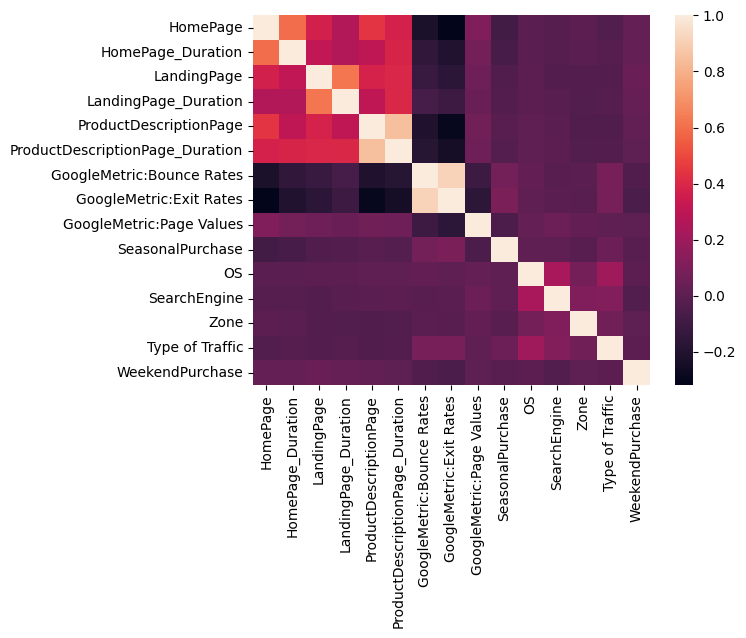

In [8]:
sns.heatmap(X.corr())

# Data Preprocess

### Numeric Transformer

In [9]:
num_tranform=Pipeline(steps=[("imputer",SimpleImputer(strategy="median")),
                             ("scaler",StandardScaler()),
                             ('poly', PolynomialFeatures(degree=2, include_bias=False))])

### Categorical Transformer

In [10]:
cat_transform = Pipeline(steps=[("imputer",SimpleImputer(strategy="most_frequent")),
                                ("onehot",OneHotEncoder(handle_unknown="ignore"))])

### Ordinal Transformer

In [11]:
ordinal_encoder= Pipeline(
    steps=[("imputer",SimpleImputer(strategy="most_frequent")),
           ("imputer2",SimpleImputer(strategy="most_frequent",missing_values='Not Specified')),
           ("ord",OrdinalEncoder())]
    )

### Gender Transformer

In [12]:
gender = Pipeline(
    steps=[("imputer",SimpleImputer(strategy="most_frequent")),
           ("imputer2",SimpleImputer(strategy="most_frequent",missing_values='Not Specified')),
           ("onehot",OneHotEncoder(handle_unknown="ignore"))]
    )

### Column Transformer

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",num_tranform,['HomePage','HomePage_Duration','LandingPage','LandingPage_Duration',
                            'ProductDescriptionPage','ProductDescriptionPage_Duration',
                             'GoogleMetric:Bounce Rates','GoogleMetric:Exit Rates',
                             'GoogleMetric:Page Values','SeasonalPurchase']
        ),
        ("cat", cat_transform, ['Month_SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic',
                                'CustomerType','Cookies Setting','Marital Status','WeekendPurchase']
        ),
        ("ordi",ordinal_encoder,['Education']),
        ("gen",gender,['Gender'])
                 ])

In [14]:
pipe=preprocessor.fit(X)
processed_x=pipe.transform(X)

# Logistic Regression

In [15]:
LR_clf = LogisticRegression(random_state=0,max_iter=7000,fit_intercept=False)
LR_clf.fit(processed_x, y)
LR_clf.score(processed_x, y)

0.6657389179281786

# GradientBoosting Classifier

In [16]:
GB_clf=GradientBoostingClassifier(random_state=0,learning_rate=1,
                                   max_depth=5,
                                   min_samples_split=0.7,
                                   min_samples_leaf=0.3)
GB_clf.fit(processed_x, y)
GB_clf.score(processed_x, y)

0.6690652365759283

# AdaBoost Classifier

In [17]:
AB_clf=AdaBoostClassifier(algorithm='SAMME',
                       learning_rate=0.01,
                       n_estimators=130,
                       random_state=0)
AB_clf.fit(processed_x, y)
AB_clf.score(processed_x, y)

0.665671033874143

# HyperParameter Tuning

In [18]:
param_grid={
    'algorithm':['SAMME','SAMME.R'],
    'learning_rate':[0.01,0.1,1], 
    'n_estimators':[130,140],
}

ABC=AdaBoostClassifier(random_state=0)
grid_search = GridSearchCV(ABC, param_grid=param_grid, cv=2)
grid_search.fit(processed_x, y)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [130, 140]})

In [19]:
best_model = grid_search.best_estimator_
best_model

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=130,
                   random_state=0)

# Predictions Export

In [20]:
processed_x_test=pipe.transform(test_data)

In [21]:
sub = pd.DataFrame(AB_clf.predict(processed_x_test), columns=['Made_Purchase'])
sub.index.name = 'id'
sub['Made_Purchase']=sub["Made_Purchase"].astype(bool)

sub.to_csv("output.csv", encoding='utf-8')

output = pd.read_csv("output.csv")